
1. Top 10 Emitentów CO2 (2023):
         country  total_emissions_million_tonnes    population
0          China                       12172.009  1.422585e+09
1  United States                        4918.407  3.434773e+08
2          India                        3062.756  1.438070e+09
3         Russia                        1733.135  1.454405e+08
4          Japan                         986.910  1.243709e+08
5           Iran                         789.676  9.060871e+07
6      Indonesia                         762.358  2.811901e+08
7   Saudi Arabia                         677.442  3.326429e+07
8        Germany                         593.766  8.454823e+07
9    South Korea                         589.178  5.174874e+07

2. Emisja na osobę w wybranych krajach Europy (2023):
          country  co2_per_capita   gdp
0          Poland           7.307  None
1          Norway           7.043  None
2         Germany           7.023  None
3           Italy           5.249  None
4           Spain  

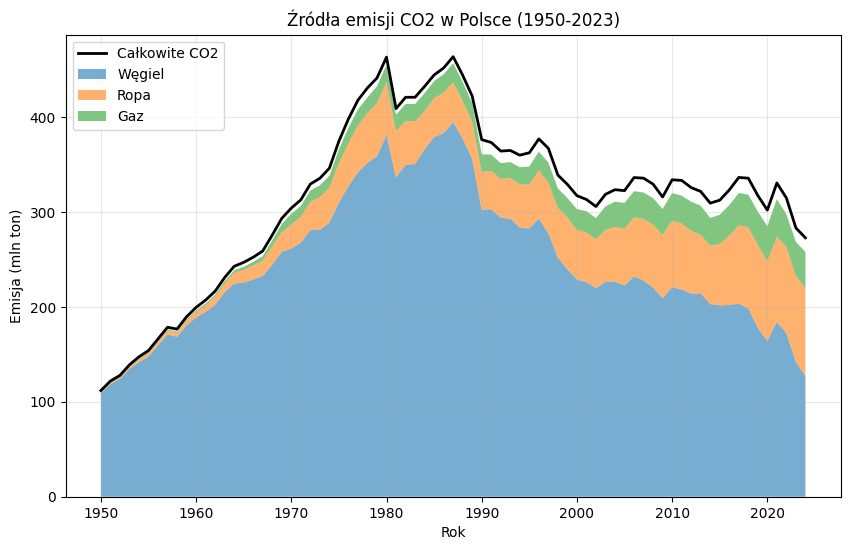

In [9]:
import pandas as pd
import sqlite3

df = pd.read_csv('owid_co2_data.csv')
conn = sqlite3.connect(':memory:')
df.to_sql('emissions', conn, index=False, if_exists='replace')
def run_query(query):
    return pd.read_sql_query(query, conn)

# ZAPYTANIE 1: Top 10 krajów z największą emisją CO2 w 2023 roku
query1 = """
SELECT
    country,
    co2 as total_emissions_million_tonnes,
    population
FROM emissions
WHERE year = 2023
  AND iso_code IS NOT NULL
ORDER BY co2 DESC
LIMIT 10;
"""
print("\n1. Top 10 Emitentów CO2 (2023):")
print(run_query(query1))

# ZAPYTANIE 2: Emisja na osobę (Per Capita) w Europie
query2 = """
SELECT
    country,
    co2_per_capita,
    gdp
FROM emissions
WHERE year = 2023
  AND country IN ('Poland', 'Germany', 'France', 'United Kingdom', 'Italy', 'Spain', 'Sweden', 'Norway')
ORDER BY co2_per_capita DESC;
"""
print("\n2. Emisja na osobę w wybranych krajach Europy (2023):")
print(run_query(query2))

# ZAPYTANIE 3: Zmiana emisji Polski na przestrzeni lat (1950-2023)
query3 = """
SELECT
    year,
    co2,
    coal_co2,
    oil_co2,
    gas_co2
FROM emissions
WHERE country = 'Poland'
  AND year >= 1950
ORDER BY year;
"""

print("\n3. Dane dla Polski (ostatnie 5 lat):")
print(run_query(query3))

# ZAPYTANIE 4: Porównanie roku 2000 vs 2023 (SELF JOIN)
# Celem jest znaleźć kraje, które najbardziej zwiększyły emisję.
query4 = """
SELECT
    t1.country AS Kraj,
    t1.co2 AS Emisja_2000,
    t2.co2 AS Emisja_2023,
    ROUND(t2.co2 - t1.co2, 2) AS Zmiana_Absolutna,
    ROUND(((t2.co2 - t1.co2) / t1.co2) * 100, 1) AS Zmiana_Procentowa
FROM emissions t1
JOIN emissions t2 ON t1.country = t2.country
WHERE t1.year = 2000
  AND t2.year = 2023
  AND t1.co2 > 50  -- Bierzemy pod uwagę tylko kraje, które już w 2000 r. miały istotną emisję (>50 mln ton)
ORDER BY Zmiana_Procentowa DESC
LIMIT 10;
"""
print("\n4. Kraje z największym wzrostem emisji (2000 vs 2023): ")
print(run_query(query4))

# Wizualizacja wyników w Pythonie
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_poland['year'], df_poland['co2'], label='Całkowite CO2', color='black', linewidth=2)
plt.stackplot(df_poland['year'],
              df_poland['coal_co2'].fillna(0),
              df_poland['oil_co2'].fillna(0),
              df_poland['gas_co2'].fillna(0),
              labels=['Węgiel', 'Ropa', 'Gaz'], alpha=0.6)

plt.title('Źródła emisji CO2 w Polsce (1950-2023)')
plt.xlabel('Rok')
plt.ylabel('Emisja (mln ton)')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()